In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
# Đường dẫn gốc
base_dir = '/content/drive/MyDrive/FaceEmotionProject'
face_dir = os.path.join(base_dir, 'facedataset', 'FACEDATASET')
emotion_dir = os.path.join(base_dir, 'emotionsdataset','EMOTIONSDATASET')

# Kiểm tra thư mục có tồn tại không
print("Face dataset:", os.path.exists(face_dir))
print("Emotion dataset:", os.path.exists(emotion_dir))


Face dataset: True
Emotion dataset: True


In [69]:
import os

# Đổi tên ảnh trong thư mục facedataset
base_face_dir = '/content/drive/MyDrive/FaceEmotionProject/facedataset/FACEDATASET'
person_folders = ['Person1', 'Person2', 'Person3', 'Person4']

for person_idx, person in enumerate(person_folders, 1):
    person_folder = os.path.join(base_face_dir, person)
    if os.path.exists(person_folder):
        image_files = os.listdir(person_folder)
        for idx, image_file in enumerate(image_files, 1):
            # Tạo tên mới cho ảnh
            new_name = f'P{person_idx}_{idx}.jpg'
            old_path = os.path.join(person_folder, image_file)
            new_path = os.path.join(person_folder, new_name)
            os.rename(old_path, new_path)  # Đổi tên ảnh
            print(f"Đổi tên {old_path} thành {new_path}")

# Đổi tên ảnh trong thư mục emotiondataset
base_emotion_dir = '/content/drive/MyDrive/FaceEmotionProject/emotionsdataset/EMOTIONSDATASET'
emotion_folders = ['happy', 'sad', 'angry']

for person_idx in range(1, 5):  # Person1 đến Person4
    for emotion in emotion_folders:
        person_emotion_folder = os.path.join(base_emotion_dir, f'Person{person_idx}_{emotion}')
        if os.path.exists(person_emotion_folder):
            image_files = os.listdir(person_emotion_folder)
            for idx, image_file in enumerate(image_files, 1):
                # Tạo tên mới cho ảnh
                new_name = f'P{person_idx}_{emotion[:2].upper()}_{idx}.jpg'  # VD: P1_HP_1.jpg
                old_path = os.path.join(person_emotion_folder, image_file)
                new_path = os.path.join(person_emotion_folder, new_name)
                os.rename(old_path, new_path)  # Đổi tên ảnh
                print(f"Đổi tên {old_path} thành {new_path}")


Đổi tên /content/drive/MyDrive/FaceEmotionProject/facedataset/FACEDATASET/Person1/Person1_1.jpg thành /content/drive/MyDrive/FaceEmotionProject/facedataset/FACEDATASET/Person1/P1_1.jpg
Đổi tên /content/drive/MyDrive/FaceEmotionProject/facedataset/FACEDATASET/Person1/Person1_12.jpg thành /content/drive/MyDrive/FaceEmotionProject/facedataset/FACEDATASET/Person1/P1_2.jpg
Đổi tên /content/drive/MyDrive/FaceEmotionProject/facedataset/FACEDATASET/Person1/Person1_23.jpg thành /content/drive/MyDrive/FaceEmotionProject/facedataset/FACEDATASET/Person1/P1_3.jpg
Đổi tên /content/drive/MyDrive/FaceEmotionProject/facedataset/FACEDATASET/Person1/Person1_34.jpg thành /content/drive/MyDrive/FaceEmotionProject/facedataset/FACEDATASET/Person1/P1_4.jpg
Đổi tên /content/drive/MyDrive/FaceEmotionProject/facedataset/FACEDATASET/Person1/Person1_45.jpg thành /content/drive/MyDrive/FaceEmotionProject/facedataset/FACEDATASET/Person1/P1_5.jpg
Đổi tên /content/drive/MyDrive/FaceEmotionProject/facedataset/FACEDATAS

In [79]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

In [202]:
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255


In [203]:
from keras.utils import to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
#Chay 1 lan Thoi => ma hoa du lieu

In [204]:
import numpy as np
#Mo kenh
x_train = np.expand_dims(x_train,axis=-1)
x_test = np.expand_dims(x_test,axis=-1)

In [80]:
# Hàm load dữ liệu
def load_data(face_dir, emotion_dir, person_info, emotion_labels, img_size=(48, 48)):
    x_data = []
    y_person = []
    y_emotion = []

    for person_name, person_id in person_info.items():
        # Thư mục ảnh gương mặt của từng người
        person_face_folder = os.path.join(face_dir, person_name)
        if not os.path.exists(person_face_folder):
            continue

        for img_name in os.listdir(person_face_folder):
            if img_name.endswith(".jpg"):
                # Load ảnh gương mặt
                img_path = os.path.join(person_face_folder, img_name)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is None:
                    continue
                img = cv2.resize(img, img_size)
                img = img.astype('float32') / 255.0
                x_data.append(np.expand_dims(img, axis=-1))  # Thêm chiều kênh cho ảnh xám

                # Nhãn người
                y_person.append(person_id)  # Dùng ID người (0, 1, 2, 3)

                # Nhãn cảm xúc
                emotion_name = img_name.split('_')[1]
                emotion_id = emotion_labels.get(emotion_name.lower(), 0)  # Gán nhãn cảm xúc
                y_emotion.append(emotion_id)

    return np.array(x_data), to_categorical(y_person, num_classes=4), to_categorical(y_emotion, num_classes=3)

# Load dữ liệu
x_data, y_person, y_emotion = load_data(face_dir, emotion_dir, person_info, emotion_labels)


In [81]:
# Chia dữ liệu thành tập huấn luyện và kiểm tra
x_train, x_test, y_train_person, y_test_person, y_train_emotion, y_test_emotion = train_test_split(
    x_data, y_person, y_emotion, test_size=0.2, random_state=42
)


In [215]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
#Mô HÌNH CNN
from keras.models import Sequential
from keras.layers import Dense , Flatten , Dropout , Conv2D , MaxPooling2D
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1))) #Lop dau tien : 32 lan tich chap , bo loc (3x3) , ham truyen "relu" , buc anh dau tien 28*28 pixel , 1 kenh ( bat buoc xuat hien so kenh = expand_dims)
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu')) #ham chinh luu tuyen tinh "relu"
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))

model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax')) #Su dung soft max de phan loai


# Nhánh nhận diện người
person_output = Dense(4, activation='softmax', name='person_output')(x)

# Nhánh nhận diện cảm xúc
emotion_output = Dense(3, activation='softmax', name='emotion_output')(x)

model = Model(inputs=input_layer, outputs=[person_output, emotion_output])

model.compile(
    optimizer='adam',
    loss={'person_output': 'categorical_crossentropy', 'emotion_output': 'categorical_crossentropy'},
    metrics={'person_output': 'accuracy', 'emotion_output': 'accuracy'}
)


In [223]:
history = model.fit(
    x_train,
    {'person_output': y_train_person, 'emotion_output': y_train_emotion},
    epochs=50,
    validation_data=(x_test, {'person_output': y_test_person, 'emotion_output': y_test_emotion})
)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 451ms/step - emotion_output_accuracy: 0.4799 - emotion_output_loss: 1.6174 - loss: 4.4129 - person_output_accuracy: 0.3468 - person_output_loss: 2.7447 - val_emotion_output_accuracy: 1.0000 - val_emotion_output_loss: 1.0810 - val_loss: 2.4656 - val_person_output_accuracy: 0.2609 - val_person_output_loss: 1.3846
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 352ms/step - emotion_output_accuracy: 1.0000 - emotion_output_loss: 4.0581e-04 - loss: 2.4457 - person_output_accuracy: 0.3924 - person_output_loss: 2.4817 - val_emotion_output_accuracy: 0.0000e+00 - val_emotion_output_loss: 1.1544 - val_loss: 2.5425 - val_person_output_accuracy: 0.2609 - val_person_output_loss: 1.3881
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 340ms/step - emotion_output_accuracy: 1.0000 - emotion_output_loss: 5.4568e-04 - loss: 1.3906 - person_output_accuracy: 0.6059 - person_output_loss: 1.3809 - val_emotion_output_accuracy: 0.0000e+00 - val_emotion_output_loss: 1.3169 - val_loss: 2.720

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


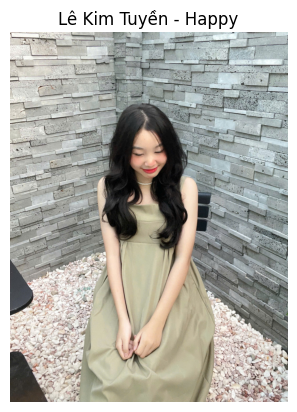

Predicted Person: Lê Kim Tuyền
Predicted Emotion: Happy


In [224]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Danh sách tên người
person_names = {
    0: 'Lương Mai Ngọc Lan',
    1: 'Ngô Đà Nguyệt',
    2: 'Lê Kim Tuyền',
    3: 'Lê Trần Trà My'
}

# Danh sách cảm xúc
emotion_names = {
    0: 'Happy',
    1: 'Sad',
    2: 'Angry'
}

# Hàm tiền xử lý ảnh
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (48,48))  # Resize về kích thước (48, 48)
    img = cv2.bitwise_not(img)  # Invert ảnh (đảo ngược màu)
    img = img.astype('float32') / 255  # Chuẩn hóa ảnh
    return img

# Hàm dự đoán tên người và cảm xúc
def predict_person_and_emotion(image_path):
    img = preprocess_image(image_path)
    img = img.reshape(1,48,48,1)  # Reshape ảnh để phù hợp với mô hình CNN
    prediction = model.predict(img)  # Dự đoán từ mô hình

    person_pred = np.argmax(prediction[0])  # Dự đoán người
    emotion_pred = np.argmax(prediction[1])  # Dự đoán cảm xúc

    img = cv2.imread(image_path, cv2.IMREAD_COLOR_RGB)  # Đọc ảnh gốc


    plt.imshow(img, cmap='gray')
    plt.title(f'{person_names[person_pred]} - {emotion_names[emotion_pred]}')
    plt.axis('off')
    plt.show()

    return person_names[person_pred], emotion_names[emotion_pred]
image_path = '/content/dui.jpg'

predicted_person, predicted_emotion = predict_person_and_emotion(image_path)

print(f'Predicted Person: {predicted_person}')
print(f'Predicted Emotion: {predicted_emotion}')





1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


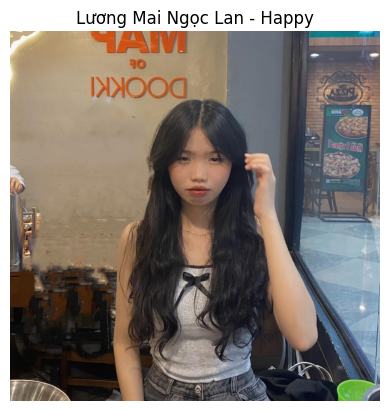

Predicted Person: Lương Mai Ngọc Lan
Predicted Emotion: Happy


In [189]:
image_path = '/content/475015654_1385735392394997_3760734803666805910_n.jpg'

predicted_person, predicted_emotion = predict_person_and_emotion(image_path)

print(f'Predicted Person: {predicted_person}')
print(f'Predicted Emotion: {predicted_emotion}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


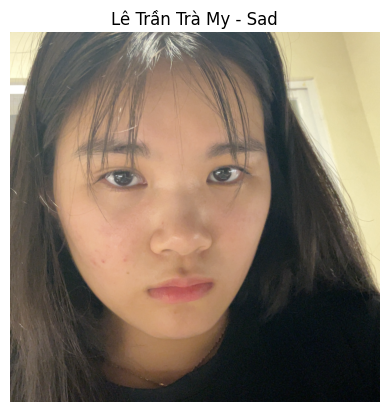

Predicted Person: Lê Trần Trà My
Predicted Emotion: Sad


In [180]:
# Đường dẫn ảnh
image_path = '/content/P4_SA_5.jpg'

predicted_person, predicted_emotion = predict_person_and_emotion(image_path)

print(f'Predicted Person: {predicted_person}')
print(f'Predicted Emotion: {predicted_emotion}')
